# Naive DE analysis

In [121]:
suppressMessages({
    library(tidyverse)
    library(limma)
    library(hashmap)
    library(magrittr)
})


## T3

In [96]:
t3k.path = '../../data/assafNormedData/T3k.RData'
load(t3k.path)
t3.tree = tree
t3.normalized = normalized 

In [54]:
bottom_id = tree[,ncol(tree)-1]
bottom_desc = tree[,ncol(tree)]

table(bottom_id)

bottom_unique_id = unique(bottom_id)

normalized[1:6, 1:6]
t3.map = hashmap(bottom_id, bottom_desc)

bottom_id
  1   2   3   4   5   6   7   8   9 
395 509 803 268 239 373 336 357  81 

,T3k,T3k,T3k,T3k,T3k,T3k
RP11-34P13.7,0,0.00000,0.000000,0.00000,0,0
FO538757.2,0,1.26122,1.197433,1.27202,0,0
AP006222.2,0,0.00000,0.000000,0.00000,0,0
RP4-669L17.10,0,0.00000,0.000000,0.00000,0,0
RP5-857K21.4,0,0.00000,0.000000,0.00000,0,0
RP11-206L10.9,0,0.00000,0.000000,0.00000,0,0


In [31]:
q_thresh = 0.1
FC_thresh = 1.2

FC_genes_all = c()
for (unique_id in bottom_unique_id) {
    is_in_id = bottom_id == unique_id
    #print(sum(is_in_id))
    #print(length(bottom_id))
    design = model.matrix(~is_in_id)
    my.lm = limma::lmFit(normalized, design=design)
    my.lm = eBayes(my.lm)
    FC_genes = topTable(my.lm, number=Inf, coef = seq(2,ncol(design)))
    FC_genes = FC_genes[FC_genes$adj.P.Val < q_thresh, c('logFC', 'adj.P.Val')]
    FC_genes = FC_genes[FC_genes$logFC > log(FC_thresh, base=2),]
    FC_genes = FC_genes[order(FC_genes$logFC, decreasing=T),]
    FC_genes$id = unique_id
    FC_genes_all = rbind(FC_genes_all, FC_genes)
}

In [32]:
table(FC_genes_all$id)


  1   2   3   4   5   6   7   8   9 
 58  37  36  60 203  66  11  24 142 

In [34]:
FC_genes_FC1_2 = FC_genes_all

## Repeat for T4 data set

In [97]:
t4k.path = '../../data/assafNormedData/T4k.RData'
load(t4k.path)
t4.tree = tree
t4.normalized = normalized 

In [58]:
bottom_id = tree[,ncol(tree)-1]
bottom_desc = tree[,ncol(tree)]

table(bottom_id)
bottom_unique_id = unique(bottom_id)
normalized[1:6, 1:6]

t4.map = hashmap(bottom_id, bottom_desc)

bottom_id
  1  10  11   2   3   4   5   6   7   8   9 
263 584 272 255 515 347 330 648 569  73 431 

,T4k,T4k,T4k,T4k,T4k,T4k
RP11-34P13.7,0,0,0,0.000000,0,0.000000
FO538757.2,0,0,0,1.285298,0,0.000000
AP006222.2,0,0,0,0.000000,0,1.537649
RP4-669L17.10,0,0,0,0.000000,0,0.000000
RP5-857K21.4,0,0,0,0.000000,0,0.000000
RP11-206L10.9,0,0,0,0.000000,0,0.000000


In [35]:
q_thresh = 0.1
FC_thresh = 1.2

FC_genes_all = c()
for (unique_id in bottom_unique_id) {
    is_in_id = bottom_id == unique_id
    #print(sum(is_in_id))
    #print(length(bottom_id))
    design = model.matrix(~is_in_id)
    my.lm = limma::lmFit(normalized, design=design)
    my.lm = eBayes(my.lm)
    FC_genes = topTable(my.lm, number=Inf, coef = seq(2,ncol(design)))
    FC_genes = FC_genes[FC_genes$adj.P.Val < q_thresh, c('logFC', 'adj.P.Val')]
    FC_genes = FC_genes[FC_genes$logFC > log(FC_thresh, base=2),]
    FC_genes = FC_genes[order(FC_genes$logFC, decreasing=T),]
    FC_genes$id = unique_id
    FC_genes_all = rbind(FC_genes_all, FC_genes)
}

In [36]:
table(FC_genes_all$id)


  1  10  11   2   3   4   5   6   7   8   9 
  5  36 223  19  21  51  74  37  62 158  79 

In [37]:
FC_genes_t4_1_2 = FC_genes_all

In [38]:
head(FC_genes_t4_1_2)

,logFC,adj.P.Val,id
FOS,0.6459973,2.191306e-19,1
JUN,0.5801561,4.504445e-14,1
IER2,0.3028873,2.385878e-04,1
TSHZ2,0.2847612,8.808492e-17,1
TXNIP,0.2672681,8.656441e-04,1
GIMAP7,0.7053506,2.128720e-37,2


## Jaccard index

In [50]:
############################################# Jaccard ########################################
# input: 2 matrices of n (diff. expressed genes) x 2 --> 1 for each experiment
#inputA<-data.frame(gene=c("a","b","c","d","e","f","g"),node=c(121,121,121,121,122,122,122))
#inputB<-data.frame(gene=c("a","b","c","d","e","f","g"),node=c(123,123,124,124,124,124,124))
get_jaccard<-function(inputA, inputB){
 splitA<-split(inputA,inputA$node)
 splitB<-split(inputB,inputB$node)
 num<-as.numeric(length(splitA)*length(splitB))
 jc<-data.frame(matrix(ncol=3,nrow=num))
 k=0
 for (i in seq(length(splitA))){
   v1<-splitA[[i]]$gene
   for (j in seq(length(splitB))){
     k=k+1
     print
     v2<-splitB[[j]]$gene
     jaccard_calc<-length(intersect(v1,v2))/length(union(v1,v2))
     jc[k,]<-c(names(splitA)[i],names(splitB)[j],jaccard_calc)
   }
 }
 jc$X3<-as.numeric(jc$X3)
 jc2<-matrix(jc$X3,nrow=length(unique(jc$X1)),ncol=length(unique(jc$X2)), byrow = TRUE)
 colnames(jc)<-c("node_exp1","node_exp2","j_indx")
 rownames(jc2)<-names(splitA)
 colnames(jc2)<-names(splitB)
 return(list(jc=jc,jc2=jc2))
}


In [61]:
inputA = FC_genes_FC1_2

inputA$gene = rownames(inputA)
inputA$node = sapply(inputA$id, function(x) t3.map[[x]])

In [62]:
head(inputA)

,logFC,adj.P.Val,id,gene,node
JUNB,0.7467553,3.660882e-42,1,JUNB,CD4.Tfh.1
ANXA1,0.7440702,3.119825e-34,1,ANXA1,CD4.Tfh.1
RGCC,0.7267831,5.773653e-32,1,RGCC,CD4.Tfh.1
ZFP36,0.6824666,9.066057e-31,1,ZFP36,CD4.Tfh.1
SRGN,0.6725841,1.985947e-36,1,SRGN,CD4.Tfh.1
LMNA,0.6531392,2.314893e-29,1,LMNA,CD4.Tfh.1


In [63]:
inputB = FC_genes_t4_1_2
inputB$gene = rownames(inputB)
inputB$node = sapply(inputB$id, function(x) t4.map[[x]])

In [64]:
head(inputB)

,logFC,adj.P.Val,id,gene,node
FOS,0.6459973,2.191306e-19,1,FOS,CD4.Icos.2
JUN,0.5801561,4.504445e-14,1,JUN,CD4.Icos.2
IER2,0.3028873,2.385878e-04,1,IER2,CD4.Icos.2
TSHZ2,0.2847612,8.808492e-17,1,TSHZ2,CD4.Icos.2
TXNIP,0.2672681,8.656441e-04,1,TXNIP,CD4.Icos.2
GIMAP7,0.7053506,2.128720e-37,2,GIMAP7,CD8.1


In [69]:
head(j$jc)

node_exp1,node_exp2,j_indx
CD4.Tfh.1,CD4_Th1.2,0.03947368
CD4.Tfh.1,CD4.Icos.1,0.00000000
CD4.Tfh.1,CD4.Icos.2,0.01612903
CD4.Tfh.1,CD4.Tfh.1,0.37974684
CD4.Tfh.1,CD4.Tfh.2,0.15384615
CD4.Tfh.1,CD4.Th1.1,0.02238806


In [70]:
options(repr.plot.width=6, repr.plot.width=10)
j<-get_jaccard(inputA,inputB)
p.jaccard = j$jc %>%
 ggplot(data=., aes(node_exp1,node_exp2)) +
 geom_tile(aes(fill=j_indx), colour="white") +
 scale_fill_gradient(low="white", high="steelblue") 

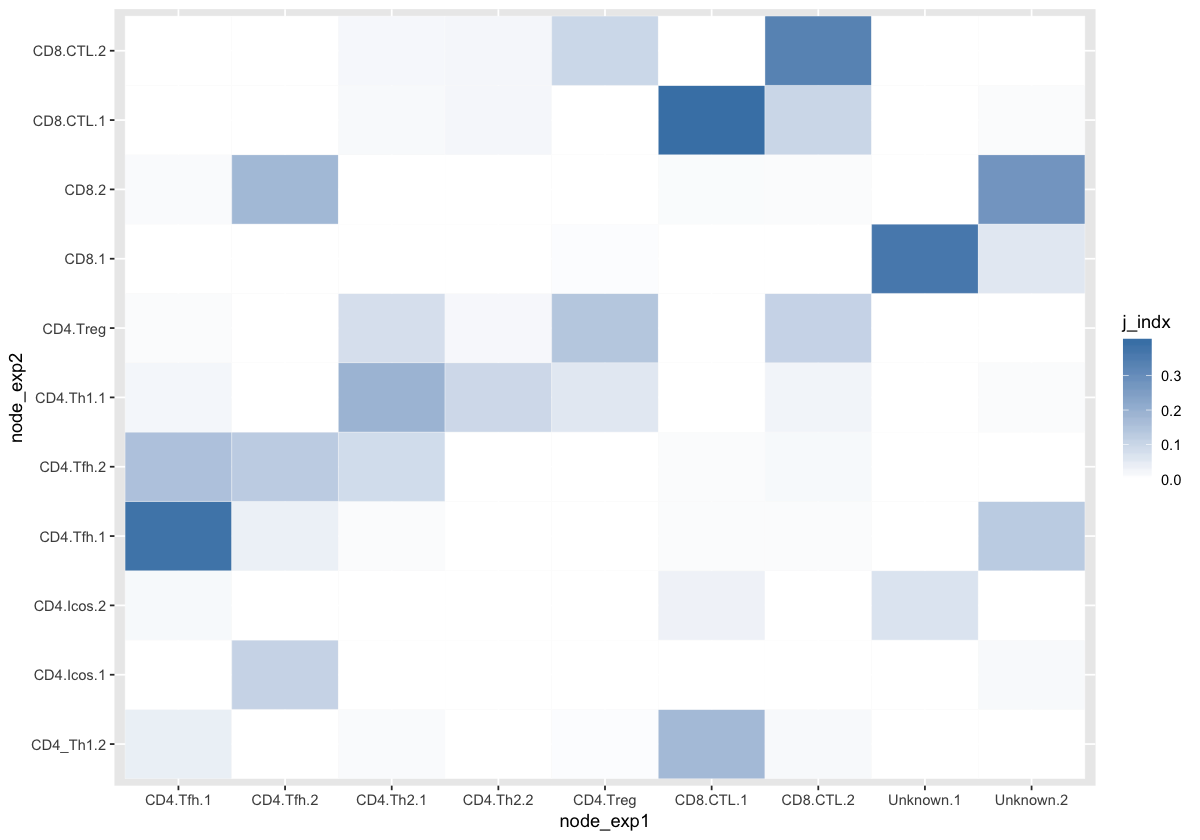

In [71]:
p.jaccard

In [73]:
ggsave(p.jaccard, file='../../figures/jaccard.pdf', width=8, height=6)

In [76]:
head(tree)

vector,vector,vector,vector,vector,vector,vector,vector,vector,vector,
1,1,1,1,1,1,1,1,1,1,CD4.Icos.2
1,1,1,1,1,2,2,2,2,2,CD8.1
1,1,1,1,1,1,1,3,3,3,CD4_Th1.2
1,1,2,2,2,3,3,4,4,4,CD4.Tfh.1
1,1,1,1,1,1,1,3,3,3,CD4_Th1.2
2,2,3,3,3,4,4,5,5,5,CD8.CTL.1


In [81]:
K = seq(ncol(tree) - 2)
tree_subset = tree[,K]

In [110]:
t3.tree.subset = t3.tree[,1:(ncol(t3.tree)-2)]
t3.desc = t3.tree[,ncol(t3.tree)]
t3.unique_cluster_numbers = apply(t3.tree.subset, 2, function(x) length(unique(x)))

In [116]:
head(t3.unique_cluster_numbers)

vector vector vector vector vector vector 
     2      3      4      5      6      7

In [113]:
t4.tree.subset = t4.tree[,1:(ncol(t4.tree)-2)]
t4.desc = t4.tree[,ncol(t4.tree)]
t4.unique_cluster_numbers = apply(t4.tree.subset, 2, function(x) length(unique(x)))

In [115]:
head(t4.unique_cluster_numbers)

vector vector vector vector vector vector 
     2      3      4      5      6      7

In [174]:
options(repr.plot.width=5, repr.plot.height=3)
p.jaccardtraj = data.frame(x=rev(seq(2, 8)), jac=jaccard.mean) %>%
  ggplot(data=.) +
  geom_point(aes(x=x, y=jac), size=1) +
  geom_line(aes(x=x, y=jac), size=0.3) +
  theme_classic() + 
  xlab('Number of clusters') + 
  ylab('Mean Jaccard coefficient')

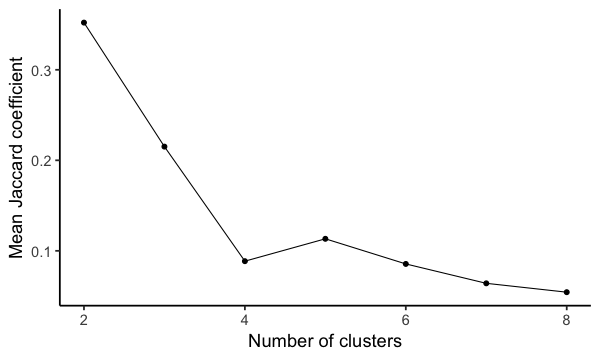

In [175]:
p.jaccardtraj

In [176]:
ggsave(p.jaccardtraj, file='../../figures/jacc_traj.pdf', width=5, height=3)

In [158]:
jaccard.mean = c()
jaccard.sd = c()
for (k in rev(seq(2, 8))) {
    print(k)
    t3.labels = t3.tree[, which(t3.unique_cluster_numbers==k)]
    t3.unique_labels = cbind(t3.labels, t3.desc)
    t3.unique_labels %<>% data.frame %>% distinct()
    colnames(t3.unique_labels) = c('id', 'desc')
    t3.namemap.df = concatLabels(t3.unique_labels)
    t3.namemap = hashmap(t3.namemap.df$id, t3.namemap.df$desc)
    
    t4.labels = t4.tree[, which(t4.unique_cluster_numbers==k)]
    t4.unique_labels = cbind(t4.labels, t4.desc)
    t4.unique_labels %<>% data.frame %>% distinct()
    colnames(t4.unique_labels) = c('id', 'desc')
    t4.namemap.df = concatLabels(t4.unique_labels)
    t4.namemap = hashmap(t4.namemap.df$id, t4.namemap.df$desc)
    print('Computing DE for t3...')
    t3.DE = SimpleDE(t3.labels, t3.normalized)
    t3.DE$gene = rownames(t3.DE)
    t3.DE$node = sapply(t3.DE$id, function(x) t3.namemap[[as.numeric(x)]])
    print('Computing DE for t4...')
    t4.DE = SimpleDE(t4.labels, t4.normalized)
    t4.DE$gene = rownames(t4.DE)
    t4.DE$node = sapply(t4.DE$id, function(x) t4.namemap[[as.numeric(x)]])
    
    j <- get_jaccard(t3.DE, t4.DE)
    jaccard.mean = c(jaccard.mean, mean(j$jc$j_indx))
    jaccard.sd = c(jaccard.sd, sd(j$jc$j_indx))
    p.jaccard = j$jc %>%
     ggplot(data=., aes(node_exp1,node_exp2)) +
     geom_tile(aes(fill=j_indx), colour="white") +
     scale_fill_gradient(low="white", high="steelblue", name='Jaccard') + xlab('3K T cell 10X dataset') + ylab('4K T cell 10X dataset') +
     theme(axis.text.x = element_text(angle=90))
    ggsave(p.jaccard, file=paste0('../../figures/jaccard_k_', k, '.pdf'), width=8, height=6)
}


[1] 8
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 7
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 6
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 5
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 4
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 3
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."
[1] 2
[1] "Computing DE for t3..."
[1] "Computing DE for t4..."


In [177]:
head(t4.unique_labels)

id,desc
1,CD4.Icos.2
1,CD8.1
1,CD4_Th1.2
1,CD4.Tfh.1
2,CD8.CTL.1
1,CD8.2


In [132]:
concatLabels = function(unique_labels) {
    label.df = unique_labels %>%
      group_by(id) %>%
      mutate(n = seq(n())) %>%
      spread(n, desc) %>%
      unite(desc, colnames(.)[-1]) %>%
      mutate(desc = sapply(desc, function(x) gsub('_NA', '', x)))
      name.map = hashmap(unique_labels$id, unique_labels$desc)
    return(label.df)
}

In [144]:
SimpleDE = function(bottom_id, normalized, q_thresh = 0.1, FC_thresh = 1.2) {
    FC_genes_all = c()
    bottom_unique_id = unique(bottom_id)
    for (unique_id in bottom_unique_id) {
        is_in_id = bottom_id == unique_id
        design = model.matrix(~is_in_id)
        my.lm = limma::lmFit(normalized, design=design)
        my.lm = eBayes(my.lm)
        FC_genes = topTable(my.lm, number=Inf, coef = seq(2,ncol(design)))
        FC_genes = FC_genes[FC_genes$adj.P.Val < q_thresh, c('logFC', 'adj.P.Val')]
        FC_genes = FC_genes[FC_genes$logFC > log(FC_thresh, base=2),]
        FC_genes = FC_genes[order(FC_genes$logFC, decreasing=T),]
        FC_genes$id = unique_id
        FC_genes_all = rbind(FC_genes_all, FC_genes)
    }
    return(FC_genes_all)
}

In [146]:
head(test)

,logFC,adj.P.Val,id
LMNA,1.2016525,2.521711e-196,1
ANXA1,0.9444955,5.399408e-101,1
NFKBIA,0.8105729,9.446349e-78,1
ZFP36,0.7470222,8.197972e-66,1
S100A4,0.7455921,2.521144e-53,1
RGCC,0.7445123,1.289132e-59,1
